In [1]:
import numpy as np
import xarray as xr
import os
from xmitgcm import open_mdsdataset
from os.path import expanduser,join,isdir
import sys
import matplotlib.pyplot as plt
user_home_dir = expanduser('~')
ecco_v4_py_dir = join(user_home_dir,'ECCOv4-py')
if isdir(ecco_v4_py_dir):
    sys.path.insert(0,ecco_v4_py_dir)
from ecco_v4_py import plot_proj_to_latlon_grid
import ecco_v4_py as ecco

# M2 Tidal amplitude map (MITgcm)

Text(0, 0.5, 'M2 Tidal Amplitude (meter?)')

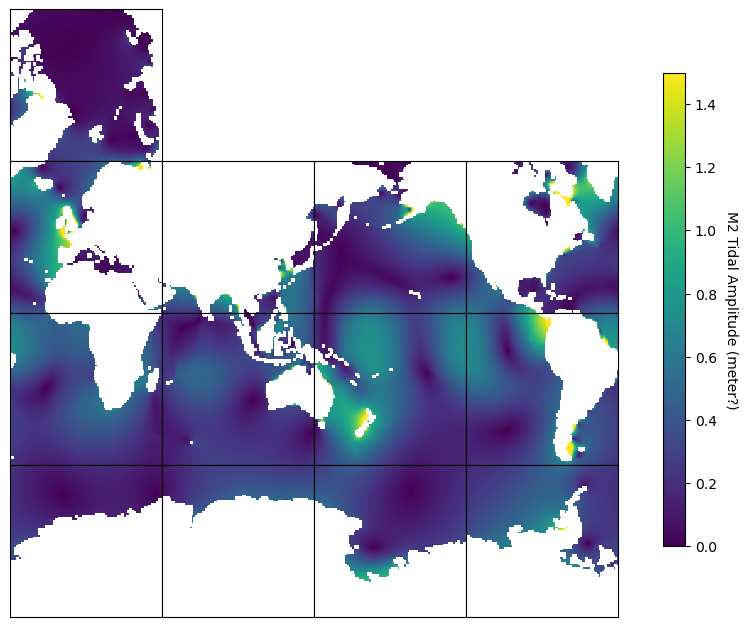

In [4]:
# File path pattern
file_pattern = "/efs_ecco/hplombat/Hugo_tidal_maps/maps_tmd_1year/amp_M2_{}.txt"
n_tiles = 13
tile_data = []

for tile in range(n_tiles):
    filename = file_pattern.format(tile)
    # Load the 90x90 array
    data = np.loadtxt(filename)
    tile_data.append(data)

# Convert to a single NumPy array with shape (tile, i, j)
stacked_array = np.stack(tile_data, axis=0)

# Create DataArray
da = xr.DataArray(
    stacked_array,
    dims=["tile", "i", "j"],
    coords={
        "tile": np.arange(n_tiles),
        "i": np.arange(90),
        "j": np.arange(90)
    },
    name="amplitude"
)
ecco.plot_tiles(da.where(da!=0), show_colorbar=True, show_tile_labels=False,
                layout='latlon', cmax=1.5, rotate_to_latlon=True);
plt.ylabel('M2 Tidal Amplitude (meter?)',rotation=270,labelpad= 15)
#plt.savefig('./Plots/amplitude_M2_1monthdata',bbox_inches='tight')

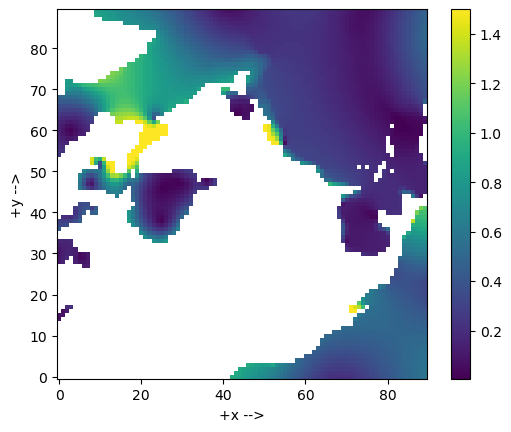

In [8]:
ecco.plot_tile(da.isel(tile=10).where(da.isel(tile=10)!=0), show_colorbar=True,
           cmax=1.5,);

# M2 Tidal Phase map (MITgcm)

Text(0, 0.5, 'M2 Tidal Amplitude (meter?)')

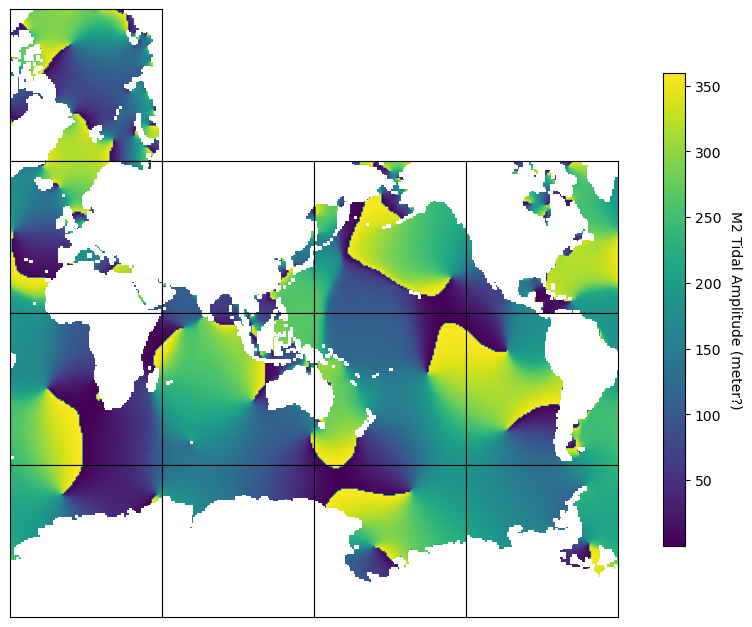

In [10]:
# File path pattern
file_pattern = "/efs_ecco/hplombat/Hugo_tidal_maps/maps_tmd_1year/pha_M2_{}.txt"
n_tiles = 13
tile_data = []

for tile in range(n_tiles):
    filename = file_pattern.format(tile)
    # Load the 90x90 array
    data = np.loadtxt(filename)
    tile_data.append(data)

# Convert to a single NumPy array with shape (tile, i, j)
stacked_array = np.stack(tile_data, axis=0)

# Create DataArray
da_pha = xr.DataArray(
    stacked_array,
    dims=["tile", "i", "j"],
    coords={
        "tile": np.arange(n_tiles),
        "i": np.arange(90),
        "j": np.arange(90)
    },
    name="phase"
)
ecco.plot_tiles(da_pha.where(da_pha!=0), show_colorbar=True, show_tile_labels=False,
                layout='latlon', rotate_to_latlon=True);
plt.ylabel('M2 Tidal Amplitude (meter?)',rotation=270,labelpad= 15)
#plt.savefig('./Plots/amplitude_M2_1monthdata',bbox_inches='tight')

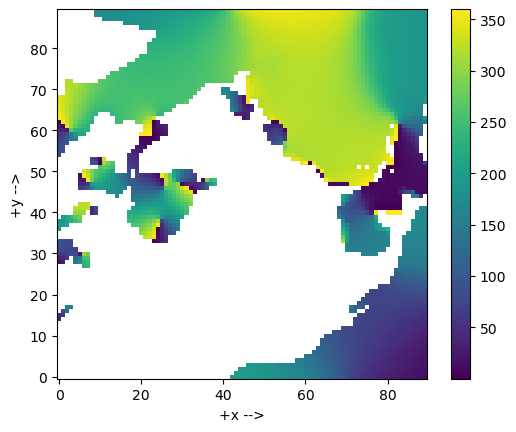

In [11]:
ecco.plot_tile(da_pha.isel(tile=10).where(da_pha.isel(tile=10)!=0), show_colorbar=True,
           );